# Solar Power Output Prediction Based on Specific Weather Features

- Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error 
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
%matplotlib inline

_____________________________________________________________________

In [2]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y - y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

--------------------------------------------------------------------

- **Load dataset**

In [3]:
# load dataset into "data" variable
data = pd.DataFrame(pd.read_csv("https://raw.githubusercontent.com/mrahma15/MyRepos/main/Hourly%20Weather%20and%20Solar%20Energy%20Dataset.csv"))

--------------------------------------------------------------------

- **Explore Data**

In [4]:
# copy data to new variable
weather_data = data

In [5]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7536 entries, 0 to 7535
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               7536 non-null   object 
 1   Hour               7536 non-null   int64  
 2   Cloud coverage     7536 non-null   float64
 3   Visibility         7536 non-null   float64
 4   Temperature        7536 non-null   float64
 5   Dew point          7536 non-null   float64
 6   Relative humidity  7536 non-null   float64
 7   Wind speed         7536 non-null   float64
 8   Station pressure   7536 non-null   float64
 9   Altimeter          7536 non-null   float64
 10  Solar energy       7536 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 647.8+ KB


In [6]:
weather_data.head()

,Date,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy
0,2/1/2016,6,0.00,9.92,0.37,-0.01,89.12,4.72,29.19,29.98,0.00
1,2/1/2016,7,0.00,10.00,0.47,-0.04,90.08,6.00,29.20,29.99,84.29
2,2/1/2016,8,0.14,9.92,0.89,0.30,92.00,2.76,29.22,30.01,531.00
3,2/1/2016,9,0.92,10.00,1.97,0.41,86.12,5.56,29.24,30.04,923.75
4,2/1/2016,10,0.46,10.00,3.15,1.07,82.48,2.12,29.27,30.06,1947.75


In [7]:
weather_data.tail()

,Date,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy
7531,10/28/2017,13,1.0,10.0,4.50,0.85,75.68,14.64,29.14,29.93,945.75
7532,10/28/2017,14,1.0,10.0,4.72,-0.50,69.04,12.76,29.14,29.93,728.50
7533,10/28/2017,15,1.0,10.0,4.18,-0.04,74.60,12.16,29.14,29.93,338.50
7534,10/28/2017,16,1.0,10.0,3.77,0.00,75.64,8.28,29.16,29.95,126.78
7535,10/28/2017,17,1.0,10.0,3.59,-0.79,73.72,8.40,29.18,29.97,20.49


In [8]:
# show dimensions of the dataset
print("No of Rows: {}\nNo of Columns: {}".format(weather_data.shape[0], weather_data.shape[1]))

No of Rows: 7536
No of Columns: 11


In [9]:
# calculate summary statistics of numerical columns
weather_data.describe()

,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy
count,7536.000000,7536.000000,7536.000000,7536.000000,7536.000000,7536.000000,7536.000000,7536.000000,7536.000000,7536.000000
mean,11.500000,0.413692,9.220553,16.429748,9.869314,65.455673,10.111448,28.596245,30.023246,1793.606583
std,3.452282,0.418636,2.002049,10.594733,9.616801,20.605739,5.680385,3.498832,0.236476,1486.162204
min,6.000000,0.000000,0.000000,-18.930000,-20.540000,14.880000,0.000000,8.500000,21.880000,0.000000
25%,8.750000,0.000000,10.000000,8.837500,3.277500,50.120000,6.180000,29.100000,29.910000,386.247500
50%,11.500000,0.290000,10.000000,18.570000,11.150000,67.120000,9.225000,29.230000,30.030000,1467.375000
75%,14.250000,0.920000,10.000000,25.142500,17.520000,82.240000,13.720000,29.340000,30.140000,3090.875000
max,17.000000,1.000000,10.000000,34.010000,27.060000,100.000000,41.560000,29.970000,30.780000,4733.250000


Text(0.5, 0, 'Solar energy(Irrandiance)')

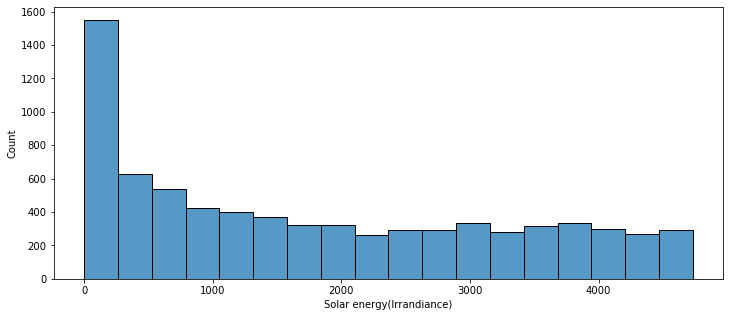

In [10]:
# plot histogram of target variable
plt.figure(figsize = (12,5))
sns.histplot(data = weather_data["Solar energy"])
plt.xlabel('Solar energy(Irrandiance)')

Text(0.5, 1.0, 'Sqrt Transform')

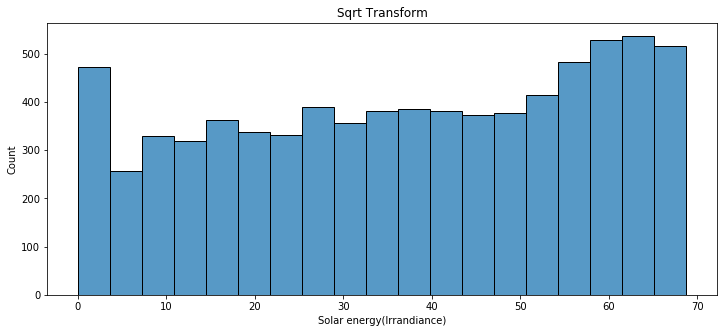

In [11]:
# plot histogram of transformed target variable
plt.figure(figsize = (12,5))
sns.histplot(data = np.sqrt(weather_data["Solar energy"]))
plt.xlabel('Solar energy(Irrandiance)')
plt.title('Sqrt Transform')

Text(0.5, 1.0, 'Log Transform')

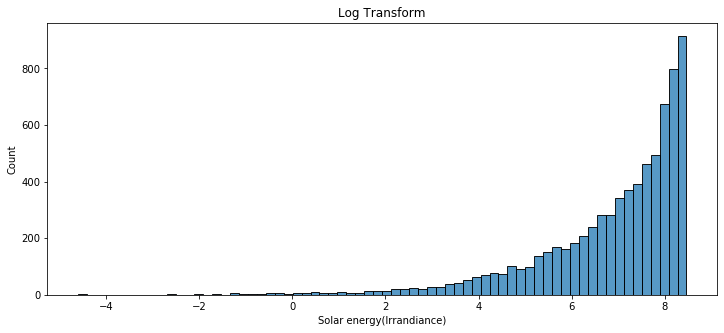

In [12]:
# plot histogram of transformed target variable
plt.figure(figsize = (12,5))
sns.histplot(data = np.log(weather_data["Solar energy"]))
plt.xlabel('Solar energy(Irrandiance)')
plt.title('Log Transform')

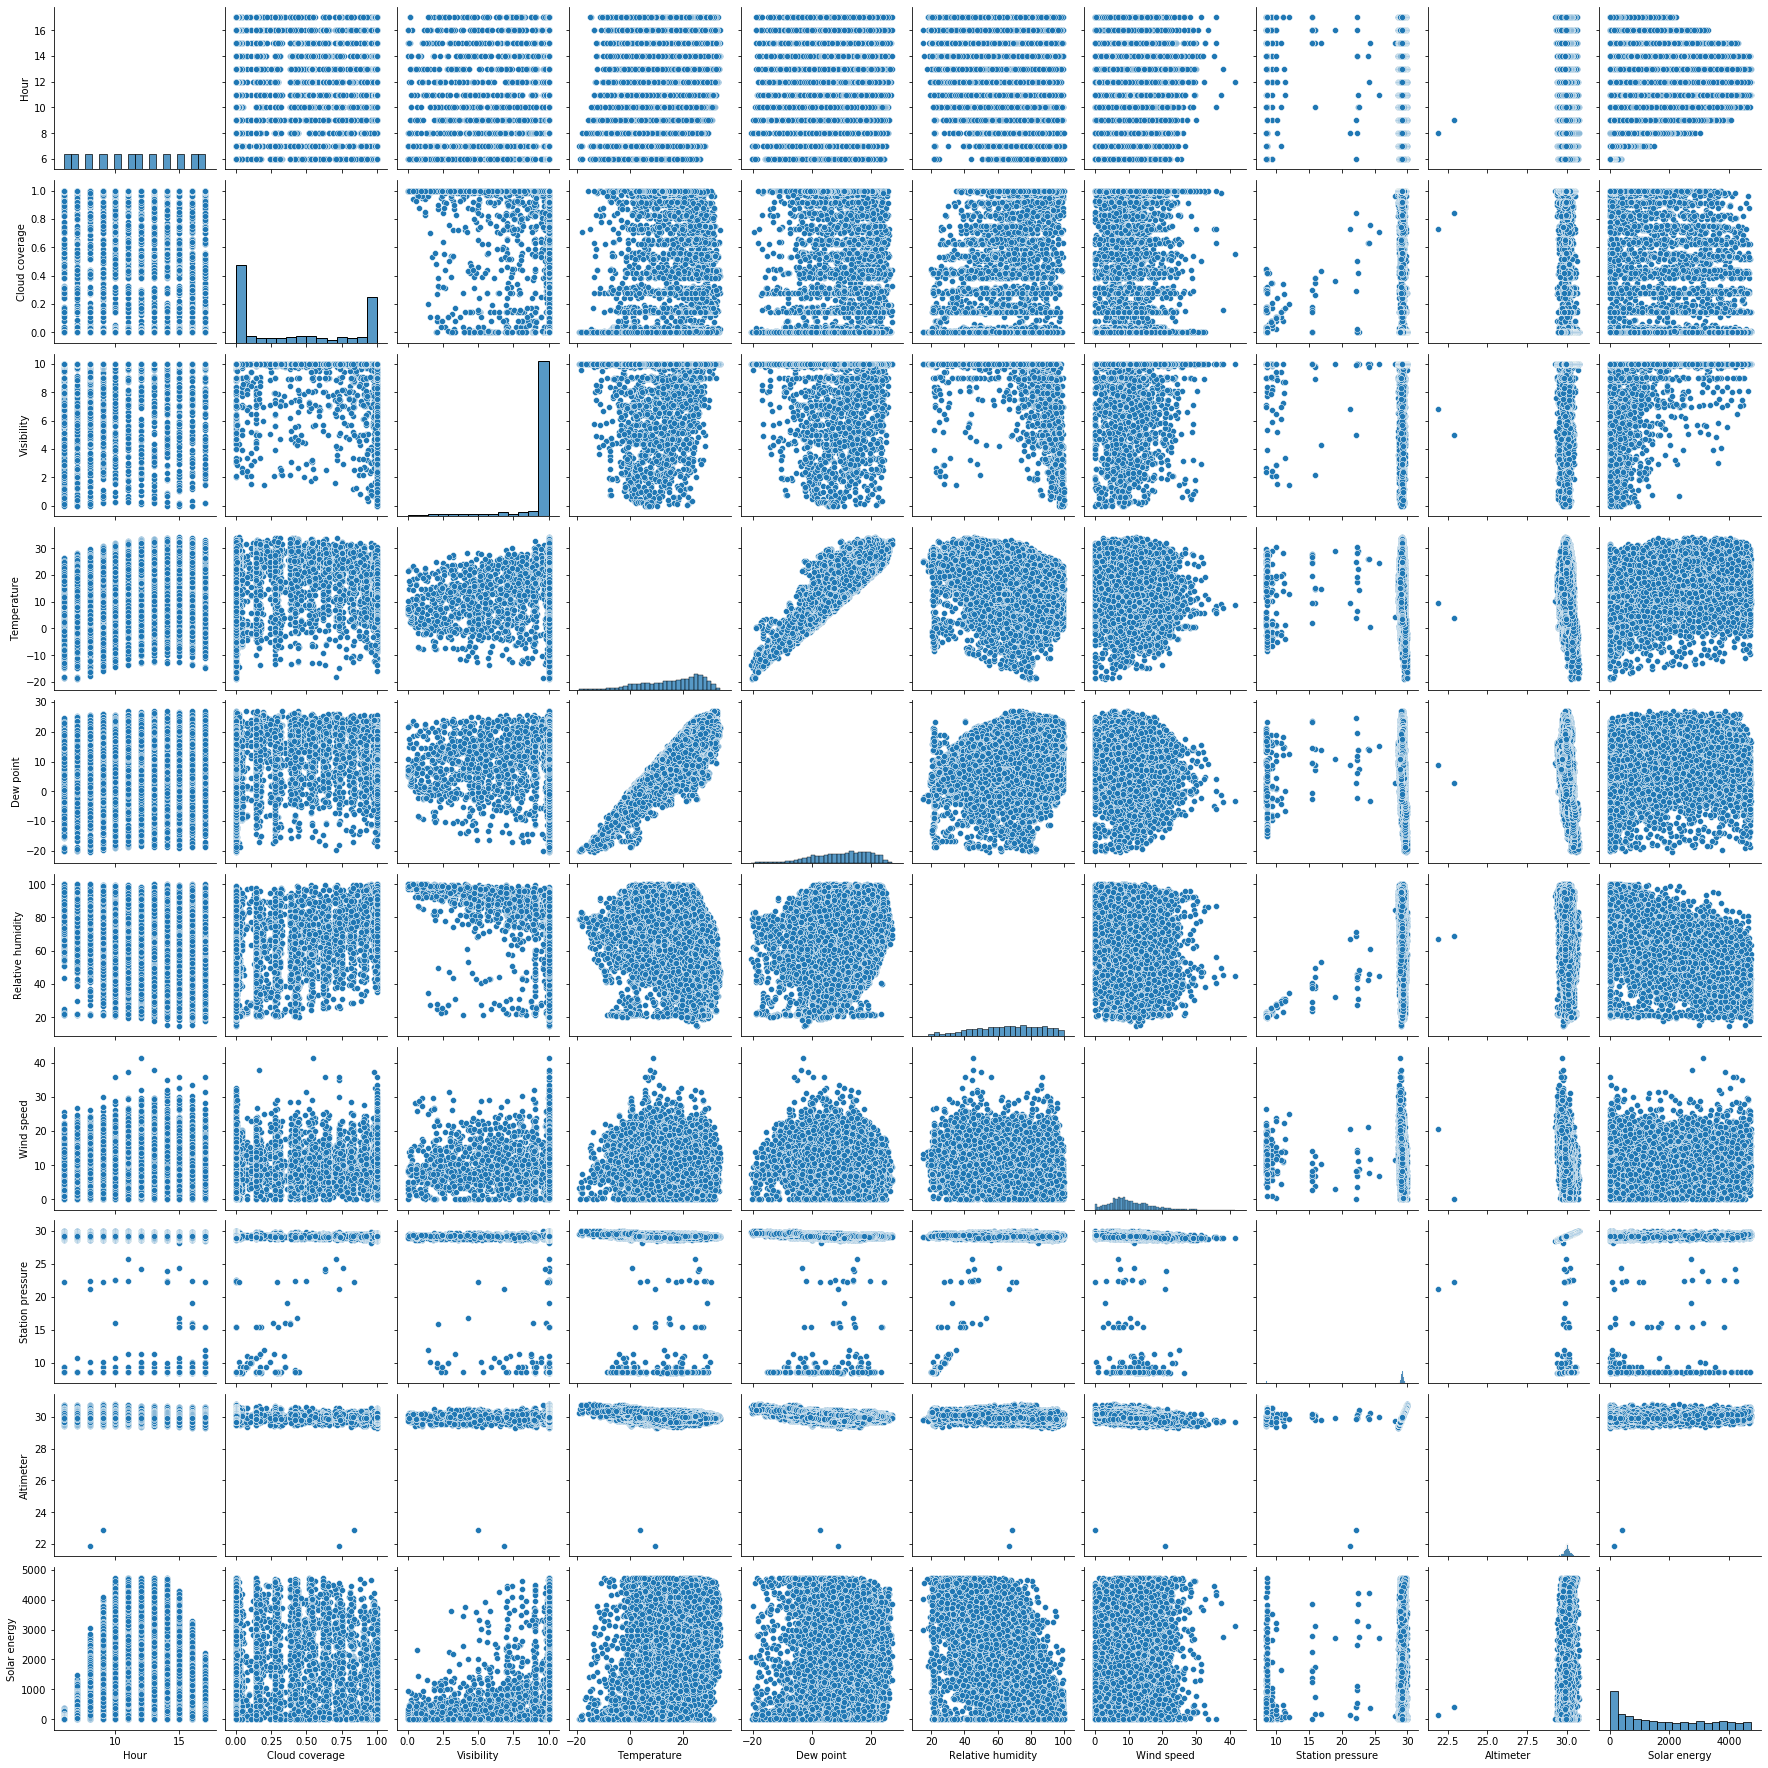

In [13]:
sns.pairplot(weather_data)

In [14]:
weather_data_corr = weather_data[['Hour', 'Cloud coverage', 'Visibility', 'Temperature', 'Dew point', 'Relative humidity', 'Wind speed', 'Station pressure', 'Altimeter', 'Solar energy']].corr()

In [15]:
mask = np.triu(np.ones_like(weather_data_corr, dtype=bool))

Text(0.5, 1, 'Correlation analysis')

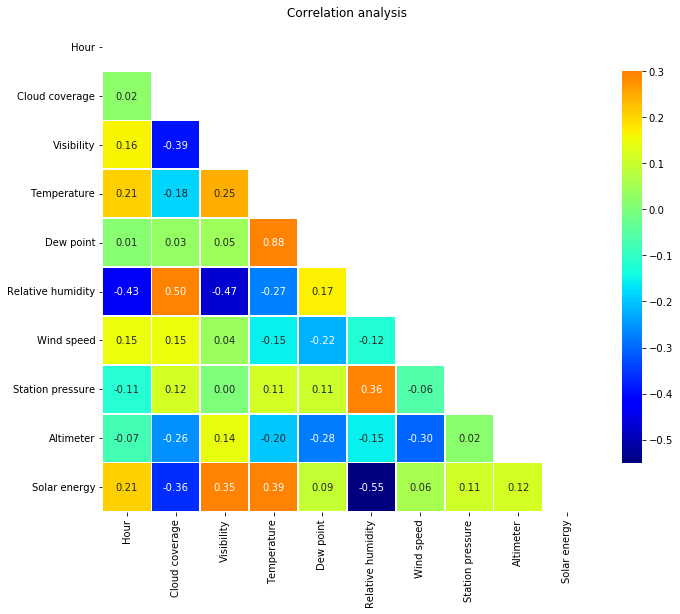

In [16]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(weather_data_corr, mask=mask, cmap='jet', vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation analysis')

- **Data Pre-processing**

In [17]:
# check for the missing values, show the total null values for each column and sort it in descending order
weather_data.isnull().sum().sort_values(ascending=False)[:10]

Date                 0
Hour                 0
Cloud coverage       0
Visibility           0
Temperature          0
Dew point            0
Relative humidity    0
Wind speed           0
Station pressure     0
Altimeter            0
dtype: int64

In [18]:
# check datatypes for variations
weather_data.dtypes

Date                  object
Hour                   int64
Cloud coverage       float64
Visibility           float64
Temperature          float64
Dew point            float64
Relative humidity    float64
Wind speed           float64
Station pressure     float64
Altimeter            float64
Solar energy         float64
dtype: object

- **Feature engineering**

In [19]:
# drop unwanted columns
unwanted_columns = ["Date","Hour"]
weather_data = weather_data.drop(columns=unwanted_columns, axis = 1)
weather_data.head()

,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy
0,0.00,9.92,0.37,-0.01,89.12,4.72,29.19,29.98,0.00
1,0.00,10.00,0.47,-0.04,90.08,6.00,29.20,29.99,84.29
2,0.14,9.92,0.89,0.30,92.00,2.76,29.22,30.01,531.00
3,0.92,10.00,1.97,0.41,86.12,5.56,29.24,30.04,923.75
4,0.46,10.00,3.15,1.07,82.48,2.12,29.27,30.06,1947.75


In [20]:
# check datatypes for cleaned dataset
weather_data.dtypes

Cloud coverage       float64
Visibility           float64
Temperature          float64
Dew point            float64
Relative humidity    float64
Wind speed           float64
Station pressure     float64
Altimeter            float64
Solar energy         float64
dtype: object

In [21]:
# split dataset into features and target sets
X = weather_data.drop(['Solar energy'], axis=1)
Y = weather_data['Solar energy']

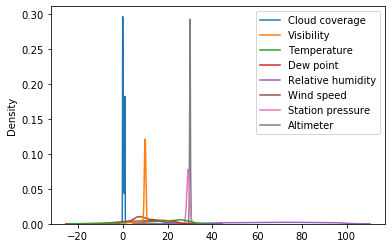

In [22]:
# plot distribution of feature dataset before scaling
featplot = sns.kdeplot(data = X)
#featplot.legend.set_title("Plot of Feature Set Before Scaling")
#featplot.figure.set_size_inches(6.5, 4.5)

In [23]:
# scale feature dataset
mm_scaler = MinMaxScaler()
ss_scaler = StandardScaler()

X_mm = mm_scaler.fit_transform(X)
X_ss = ss_scaler.fit_transform(X)

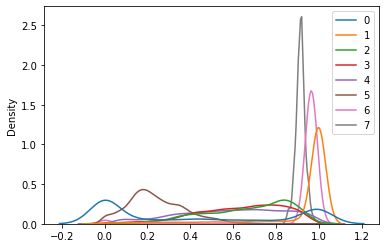

In [24]:
# plot the MinMax scaled feature set
sns.kdeplot(data = X_mm)

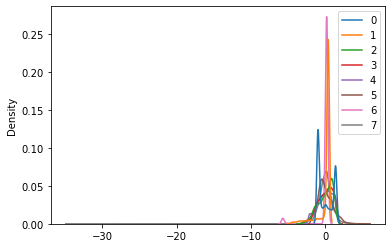

In [25]:
# plot the StandardScaler scaled feature set
sns.kdeplot(data = X_ss)

In [26]:
# set feature variable
#X = X_mm
X = X_ss

In [27]:
# split is 3:1 which is 0.75:0.25
x_train, x_test, y_train, y_test = train_test_split(X, np.sqrt(Y), test_size=0.25, random_state=0)
print('X_train dimension= ', x_train.shape)
print('X_test dimension= ', x_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_test dimension= ', y_test.shape)

X_train dimension=  (5652, 8)
X_test dimension=  (1884, 8)
y_train dimension=  (5652,)
y_test dimension=  (1884,)


----------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------

# Linear Regression

# Model

In [28]:
sk_lr_model = LinearRegression()
sk_lr_model.fit(x_train,y_train)
sk_lr_preds = sk_lr_model.predict(x_test)

# Evaluation

In [29]:
# Find the accuracy
accuracy = sk_lr_model.score(x_test,y_test)
print('Accuracy :',accuracy*100,'%')

Accuracy : 46.18817289456047 %


In [30]:
print("MAE : ", mean_absolute_error(y_test, sk_lr_preds))

MAE :  11.91035326015108


In [31]:
print("MSE : ", mean_squared_error(y_test, sk_lr_preds))

MSE :  222.4052156716738


In [32]:
print("RMSE : ", np.sqrt(mean_squared_error(y_test, sk_lr_preds)))

RMSE :  14.913256373833107


In [33]:
print("R2 Score : ", r2score(sk_lr_preds, y_test))

R2 Score :  0.46188172894560475


In [34]:
df = pd.DataFrame({'Actual': y_test, 'Model Prediction': sk_lr_preds})
df

,Actual,Model Prediction
3240,0.000000,16.185203
4375,32.218007,20.446306
6305,66.625821,52.106012
3838,2.330236,30.238156
7419,50.938689,40.117613
...,...,...
2868,2.971532,29.786635
6438,58.696252,53.924002
1108,65.169011,44.782125
3587,0.000000,21.488704


----------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------

# Reguralized Regression

# Model

In [35]:
sk_lr_model = Ridge()
sk_lr_model.fit(x_train,y_train)
sk_lr_preds = sk_lr_model.predict(x_test)

# Evaluation

In [36]:
# Find the accuracy
accuracy = sk_lr_model.score(x_test,y_test)
print('Accuracy :',accuracy*100,'%')

Accuracy : 46.18828251881793 %


In [37]:
print("MAE : ", mean_absolute_error(y_test, sk_lr_preds))

MAE :  11.910689267788701


In [38]:
print("MSE : ", mean_squared_error(y_test, sk_lr_preds))

MSE :  222.40476259271458


In [39]:
print("RMSE : ", np.sqrt(mean_squared_error(y_test, sk_lr_preds)))

RMSE :  14.913241183348259


In [40]:
print("R2 Score : ", r2score(sk_lr_preds, y_test))

R2 Score :  0.46188282518817925


In [41]:
df = pd.DataFrame({'Actual': y_test, 'Model Prediction': sk_lr_preds})
df

,Actual,Model Prediction
3240,0.000000,16.189503
4375,32.218007,20.448493
6305,66.625821,52.101976
3838,2.330236,30.232079
7419,50.938689,40.118651
...,...,...
2868,2.971532,29.789354
6438,58.696252,53.919468
1108,65.169011,44.779239
3587,0.000000,21.488420


----------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------

# SVR (NO PCA)

In [42]:
sk_lr = SVR(kernel='linear', C=1e3)
sk_lr.fit(x_train, y_train)
sk_lr_preds = sk_lr.predict(x_test)

# Evaluation

In [43]:
# Find the accuracy
accuracy = sk_lr.score(x_test,y_test)
print('Accuracy : ',accuracy*100,'%')

Accuracy :  44.364332499116 %


In [44]:
print("MAE : ", mean_absolute_error(y_test, sk_lr_preds))

MAE :  11.821080132873554


In [45]:
print("MSE : ", mean_squared_error(y_test, sk_lr_preds))

MSE :  229.9431796903409


In [46]:
print("RMSE : ", np.sqrt(mean_squared_error(y_test, sk_lr_preds)))

RMSE :  15.163877462256838


In [47]:
print("R2 Score : ", r2score(sk_lr_preds, y_test))

R2 Score :  0.44364332499116


In [48]:
df = pd.DataFrame({'Actual': y_test, 'Model Prediction': sk_lr_preds})
df

,Actual,Model Prediction
3240,0.000000,15.235724
4375,32.218007,18.291425
6305,66.625821,55.259276
3838,2.330236,30.417776
7419,50.938689,41.495418
...,...,...
2868,2.971532,29.300022
6438,58.696252,57.249283
1108,65.169011,46.388193
3587,0.000000,21.743667


In [49]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)
svr_rbf_preds = svr_rbf.predict(x_test)


# Evaluation

In [50]:
# Find the accuracy
accuracy = svr_rbf.score(x_test,y_test)
print('Accuracy :',accuracy*100,'%')

Accuracy : 52.82128002144544 %


In [51]:
print("MAE : ", mean_absolute_error(y_test, svr_rbf_preds))

MAE :  10.581100909206073


In [52]:
print("MSE : ", mean_squared_error(y_test, svr_rbf_preds))

MSE :  194.990468756696


In [53]:
print("RMSE : ", np.sqrt(mean_squared_error(y_test, svr_rbf_preds)))

RMSE :  13.963898766343732


In [54]:
print("R2 Score : ", r2score(svr_rbf_preds, y_test))

R2 Score :  0.5282128002144544


In [55]:
df = pd.DataFrame({'Actual': y_test, 'Model Prediction': svr_rbf_preds})
df

,Actual,Model Prediction
3240,0.000000,23.479985
4375,32.218007,17.200750
6305,66.625821,55.804155
3838,2.330236,-3.863199
7419,50.938689,41.205754
...,...,...
2868,2.971532,18.129731
6438,58.696252,53.894216
1108,65.169011,46.580255
3587,0.000000,19.490562


In [56]:
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
svr_poly.fit(x_train, y_train)
svr_poly_preds = svr_poly.predict(x_test)

# Evaluation

In [57]:
# Find the accuracy
accuracy = svr_poly.score(x_test,y_test)
print('Accuracy : ',accuracy*100,'%')

Accuracy :  41.595128695510155 %


In [58]:
print("MAE : ", mean_absolute_error(y_test, svr_poly_preds))

MAE :  11.791892332091916


In [59]:
print("MSE : ", mean_squared_error(y_test, svr_poly_preds))

MSE :  241.38834708770517


In [60]:
print("RMSE : ", np.sqrt(mean_squared_error(y_test, svr_poly_preds)))

RMSE :  15.536677479039886


In [61]:
print("R2 Score : ", r2score(svr_poly_preds, y_test))

R2 Score :  0.41595128695510153


In [62]:
df = pd.DataFrame({'Actual': y_test, 'Model Prediction': svr_poly_preds})
df

,Actual,Model Prediction
3240,0.000000,10.333138
4375,32.218007,21.465645
6305,66.625821,51.632828
3838,2.330236,22.093302
7419,50.938689,43.454132
...,...,...
2868,2.971532,33.153016
6438,58.696252,54.059897
1108,65.169011,55.339866
3587,0.000000,20.950336


----------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------

# PCA Dim

In [63]:
# split dataset into features and target sets
X = weather_data.drop(['Solar energy'], axis=1)
Y = weather_data['Solar energy']

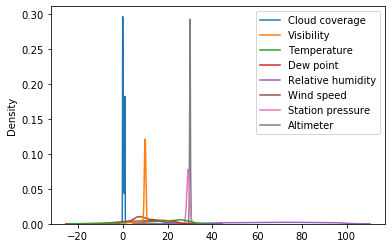

In [64]:
# plot distribution of feature dataset before scaling
featplot = sns.kdeplot(data = X)

In [65]:
# scale feature dataset
mm_scaler = MinMaxScaler()
ss_scaler = StandardScaler()

X_mm = mm_scaler.fit_transform(X)
X_ss = ss_scaler.fit_transform(X)

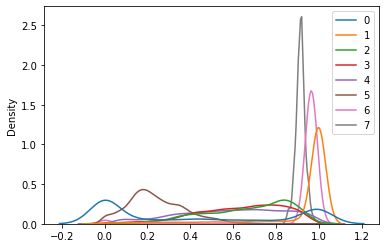

In [66]:
# plot the MinMax scaled feature set
sns.kdeplot(data = X_mm)

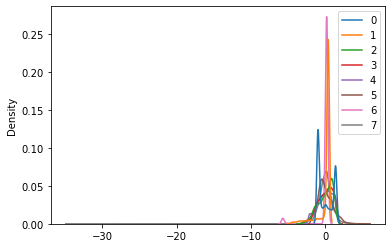

In [67]:
# plot the StandardScaler scaled feature set
sns.kdeplot(data = X_ss)

In [68]:
# set feature variable
X = X_mm
#X = X_ss

In [69]:
# split is 3:1 which is 0.75:0.25
x_train, x_test, y_train, y_test = train_test_split(X, np.sqrt(Y), test_size=0.25, random_state=0)
print('X_train dimension= ', x_train.shape)
print('X_test dimension= ', x_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_test dimension= ', y_test.shape)

X_train dimension=  (5652, 8)
X_test dimension=  (1884, 8)
y_train dimension=  (5652,)
y_test dimension=  (1884,)


In [70]:
pca = PCA(n_components=2)
pca_x_train = pca.fit_transform(x_train)
pca_x_test = pca.fit_transform(x_test)
#pca_x_train = pd.DataFrame(data = pca_x_train, columns = ['z1','z2','z3','z4','z5'] )
#pca_x_test = pd.DataFrame(data = pca_x_test, columns = ['z1','z2','z3','z4','z5'] )
pca_x_train

array([[ 0.69886573,  0.19302903],
       [-0.00840783, -0.3055596 ],
       [-0.43392441, -0.29781318],
       ...,
       [-0.53822491, -0.19823956],
       [ 0.25569942, -0.34647244],
       [ 0.05491927, -0.30642451]])

In [71]:
pca_x_test

array([[-0.08219024,  0.25559604],
       [ 0.69516304, -0.04260259],
       [-0.48696082, -0.23960475],
       ...,
       [-0.31389656,  0.06630959],
       [ 0.68630453,  0.16419806],
       [ 0.59414066,  0.24015633]])

--------------------------------------------------------------------

# Linear Regression

# Model

In [72]:
sk_lr_model = LinearRegression()
sk_lr_model.fit(pca_x_train, y_train)
sk_lr_preds = sk_lr_model.predict( pca_x_test )

# Evaluation

In [73]:
# Find the accuracy
accuracy = sk_lr_model.score(pca_x_test,y_test)
print('Accuracy : ',accuracy*100,'%')

Accuracy :  25.62221734622857 %


In [74]:
print("MAE : ", mean_absolute_error(y_test, sk_lr_preds))

MAE :  14.436815446675544


In [75]:
print("MSE : ", mean_squared_error(y_test, sk_lr_preds))

MSE :  307.40466700527213


In [76]:
print("RMSE : ", np.sqrt(mean_squared_error(y_test, sk_lr_preds)))

RMSE :  17.5329594480017


In [77]:
print("R2 Score : ", r2score(sk_lr_preds, y_test))

R2 Score :  0.2562221734622857


In [78]:
df = pd.DataFrame({'Actual': y_test, 'Model Prediction': sk_lr_preds})
df

,Actual,Model Prediction
3240,0.000000,34.225342
4375,32.218007,23.689777
6305,66.625821,50.997760
3838,2.330236,17.247954
7419,50.938689,45.121610
...,...,...
2868,2.971532,41.677998
6438,58.696252,47.849167
1108,65.169011,42.192287
3587,0.000000,20.280558


----------------------------------------------------------------------------------------

# SVR 

In [79]:
svr_lin = SVR(kernel='linear', C=1e2)
svr_lin.fit(pca_x_train, y_train)
svr_lin_preds = svr_lin.predict(pca_x_test)

# Evaluation

In [80]:
# Find the accuracy
accuracy = svr_lin.score(pca_x_test,y_test)
print('Accuracy :',accuracy*100,'%')

Accuracy : 23.217863061428158 %


In [81]:
print("MAE : ", mean_absolute_error(y_test, svr_lin_preds))

MAE :  14.35743935986956


In [82]:
print("MSE : ", mean_squared_error(y_test, svr_lin_preds))

MSE :  317.34190500714055


In [83]:
print("RMSE : ", np.sqrt(mean_squared_error(y_test, svr_lin_preds)))

RMSE :  17.81409287634766


In [84]:
print("R2 Score : ", r2score(svr_lin_preds, y_test))

R2 Score :  0.23217863061428157


In [85]:
df = pd.DataFrame({'Actual': y_test, 'Model Prediction': svr_lin_preds})
df

,Actual,Model Prediction
3240,0.000000,36.325554
4375,32.218007,22.662279
6305,66.625821,55.951335
3838,2.330236,15.920739
7419,50.938689,49.174164
...,...,...
2868,2.971532,45.227988
6438,58.696252,52.366301
1108,65.169011,45.748536
3587,0.000000,18.905723


In [86]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(pca_x_train, y_train)
svr_rbf_preds = svr_rbf.predict(pca_x_test)

# Evaluation

In [87]:
# Find the accuracy
accuracy = svr_rbf.score(pca_x_test,y_test)
print('Accuracy :',accuracy*100,'%')

Accuracy : 26.061843205587433 %


In [88]:
print("MAE : ", mean_absolute_error(y_test, svr_rbf_preds))

MAE :  13.967980346023314


In [89]:
print("MSE : ", mean_squared_error(y_test, svr_rbf_preds))

MSE :  305.5876856960523


In [90]:
print("RMSE : ", np.sqrt(mean_squared_error(y_test, svr_rbf_preds)))

RMSE :  17.481066491952152


In [91]:
print("R2 Score : ", r2score(svr_rbf_preds, y_test))

R2 Score :  0.2606184320558743


In [92]:
df = pd.DataFrame({'Actual': y_test, 'Model Prediction': svr_rbf_preds})
df

,Actual,Model Prediction
3240,0.000000,37.759348
4375,32.218007,20.011405
6305,66.625821,52.659871
3838,2.330236,18.848480
7419,50.938689,49.243954
...,...,...
2868,2.971532,46.180112
6438,58.696252,51.368784
1108,65.169011,46.544958
3587,0.000000,17.895540


In [93]:
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
svr_poly.fit(pca_x_train, y_train)
svr_poly_preds = svr_poly.predict(pca_x_test)

# Evaluation

In [94]:
# Find the accuracy
accuracy = svr_poly.score(pca_x_test,y_test)
print('Accuracy :',accuracy*100,'%')

Accuracy : 12.88341338300053 %


In [95]:
print("MAE : ", mean_absolute_error(y_test, svr_poly_preds))

MAE :  15.474563389944453


In [96]:
print("MSE : ", mean_squared_error(y_test, svr_poly_preds))

MSE :  360.054364947874


In [97]:
print("RMSE : ", np.sqrt(mean_squared_error(y_test, svr_poly_preds)))

RMSE :  18.97509854909518


In [98]:
print("R2 Score : ", r2score(svr_poly_preds, y_test))

R2 Score :  0.1288341338300053


In [99]:
df = pd.DataFrame({'Actual': y_test, 'Model Prediction': svr_poly_preds})
df

,Actual,Model Prediction
3240,0.000000,49.914851
4375,32.218007,25.236133
6305,66.625821,37.086558
3838,2.330236,29.040381
7419,50.938689,43.623170
...,...,...
2868,2.971532,45.420058
6438,58.696252,40.273720
1108,65.169011,46.285296
3587,0.000000,24.955841
